In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=18)    # fontsize of the tick labels
plt.rc('ytick', labelsize=18)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize

## Problem 1: Hartree-Fock for Helium

I don't really understand how to solve this without finite differences. Check Thissen tomorrow!

## Problem 2: The Poisson Equation

The Hartree potential is generated by the charge distribution: 

$$ V_H(r) = \int dr' \frac{n(r')}{|r-r'|} \rightarrow \nabla^2 V_H(r) = -4\pi n(r)$$

The ground state density of the helium atom is $n(r) = 2n_s(r) = 2 |\varphi(r)|^2$ where $n_s$ is the density for one orbital (one electron). Introducing the electro-static potential $\nabla^2 V_{sH}(r) = -4\pi n_s(r)$ and using $U(r) = r V_{sH}(r)$ as well as $u(r) = \sqrt{4 \pi n_s(r)} = \sqrt{4\pi} r \varphi(r)$ we can write the Poisson equation on the form

$$ \frac{d^2}{dr^2}U(r) = -\frac{u^2(r)}{r}, \hspace{10px} U(0) = 0, U(r_{max}) = 1 $$.

Finally, using $U_0(r) = U(r) - r/r_{max}$ we obtain 

$$ \frac{d^2}{dr^2}U_0(r) = -\frac{u^2(r)}{r}, \hspace{10px} U_0(0) = 0, U_0(r_{max}) = 0 $$.

We wish to solve this for $U(r)$. Rewriting using the finite difference method, we obtain the following system off equations (written on diagonal form utilizing the boundary conditions on $U_0$) (on N points $i\in(1,N)):

$$ A' U_0' = B$$
with

\begin{equation}
    A' = 
    \begin{bmatrix}
        -2 & 1 & 0 & 0 & 0 \\
         1 & -2 & 1 & 0 & 0 \\
         0 & 1 & -2 & 1 & 0 \\
        ... \\
    \end{bmatrix}
\end{equation},

\begin{equation}
    B = 
    \begin{bmatrix}
        b(r_1) = - 4 \pi h^2 |\varphi(r_1)|^2 r_1 - 0\\
        b(r_2) \\
        b(r_3) \\
        ... \\
    \end{bmatrix}
\end{equation}

We use Hartree units, such that $m_e = 1, e = 1, \hbar=1, 4\pi\epsilon_0 = 1, a_0=1$.

Text(0, 0.5, '$V(r)$')

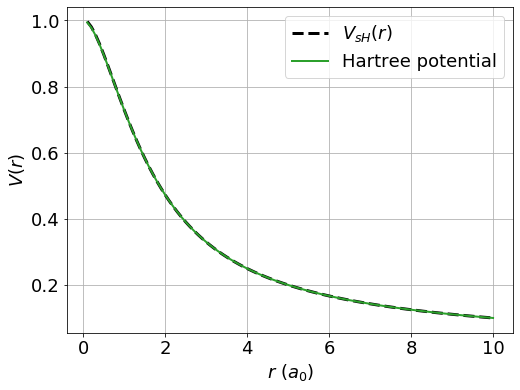

In [6]:
def hydrogen_ground_state(r):
    return 1/np.sqrt(np.pi) * np.exp(-r)

def hart_pot(r):
    return 1/r - (1+1/r)*np.exp(-2*r)

N = 100 # Number of  points
h = 0.1
r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
phi_dens = hydrogen_ground_state(r)**2
B = -np.array([4*np.pi*h**2*phi_dens[i]*r[i] for i in range(N)])
A_p = np.zeros((N,N)) + np.diagflat(-2*np.ones(N), k=0) + np.diagflat(np.ones(N-1), k=1) + np.diagflat(np.ones(N-1), k=-1)

U0_p = np.linalg.solve(A_p, B) # Solve the system of equations for U_0
# TODO pad with zeros to get boundary?
rmax = r[-1] + h  # The endpoint distance
U = U0_p + r/rmax # Extract U
Vsh = U/r # Extract the static potential

# PLot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, Vsh, color='k', linestyle='--', linewidth=3, label=r'$V_{sH}(r)$')
ax.plot(r, hart_pot(r), color='C2', linestyle='-', linewidth=2, label='Hartree potential')
ax.legend(loc='best')
ax.grid()
ax.set_xlabel(r'$r$ $(a_0)$')
ax.set_ylabel(r'$V(r)$')

## Problem 3: Kohn-Sham equation

The Kohn-Sham equation equation takes the form:

$$ \left[ -\frac{1}{2}\frac{d^2}{dr^2} -\frac{2}{r} + V_H(r) + V_x(r) + V_c(r) \right]u(r) = \epsilon u(r) $$

with boundary conditions $u(0) = u(r_{max}) = 0$. Rewriting this with the finite difference method, we obtain: 

$$ -\frac{1}{2h^2}\left[u(r_{i+1})+u(r_{i-1})\right] + \left[\frac{1}{h^2} -\frac{2}{r_i} + V_H(r_i) + V_x(r_i) + V_c(r_i) \right]u(r_i) = \epsilon u(r_i) $$

If we rewrite this on matrix form, we obtain the matrix equation: 

$$ Cu = \epsilon \tilde{u} $$
where $\tilde{u} = [u(r_1), u(r_2), ... , u(r_{max}-h)$ i.e. for $ r \in(h, r_{max}-h)$. This is due to the eigenvalue equation being undefined for the endpoints. Thus $C$ is NxN+2, $ u$ is N+2 and $\tilde{u}$ is N.

Using the same trick as in problem 2, we can handle these problematic points by subtracting $-\frac{1}{2h^2}u(r_0)$ and $-\frac{1}{2h^2}u(r_{max})$ from equations for rows 1 and N in $C$. Since they are $u(0) = u(r_{max}=0$) we obtain the equation

$$ C' \tilde{u} = \epsilon \tilde{u} $$
which is a problem on diagonal form, with the boundary conditions baked into the matrix. They will thus automatically appear in our eigenvectors $\tilde{u}$. $C'$ is on the form

\begin{equation}
    C' = 
    \begin{bmatrix}
        \frac{1}{h^2} -\frac{2}{r_1}+V_H(r_1) + V_x(r_1) + V_c(r_1) & -\frac{1}{2h^2} & 0 & 0 & 0 \\
         -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{2}{r_2}+V_H(r_2) + V_x(r_2) + V_c(r_2) & -\frac{1}{2h^2} & 0 & 0 \\
         0 & -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{2}{r_3}+V_H(r_3) + V_x(r_3) + V_c(r_3) & -\frac{1}{2h^2} & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

For our problem, we wish to solve the radial equation for the hydrogen atom. We thus set $V_H = V_x = V_c = 0$. We call the resulting eigenvalue equation 

$$ \Gamma \tilde{u} = E \tilde{u}$$

with 

\begin{equation}
    \Gamma = 
    \begin{bmatrix}
        \frac{1}{h^2} -\frac{1}{r_1} & -\frac{1}{2h^2} & 0 & 0 & 0 \\
         -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{1}{r_2}& -\frac{1}{2h^2} & 0 & 0 \\
         0 & -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{1}{r_3} & -\frac{1}{2h^2} & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

In [9]:
N = 2000 # Number of  points
h = 0.005
r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
Gamma = np.zeros((N,N)) + np.diagflat((1/h**2 - 1/r)*np.ones(N), k=0) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=1) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=-1)

eigs, eigv = np.linalg.eigh(Gamma)  # Solve the eigenvalue problem for eigenvectors and eigenfunctions 
E0 = eigs[0]  # The eigenvalues & vectors are returned in ascending order, thus with the ground state first
u0 = eigv[:,0]  # Normalized eigenvector

Here we obtain the normalized eigenvector for the ground state, i.e. $u_0(r)$ which is normalized. Since $u_0(r) \propto \varphi_0(r)$ this means that the wavefunction is also normalized. However, we want it to be $L2$-normalized so we have to renormalize the wave function. We require:

$$ 1 = k^2 \int_0^{r_{max}} |\varphi(x)|dx =  k^2 4 \pi \int_0^{r_{max}} |\varphi(r)|^2 r^2 dr \rightarrow k = \left(4 \pi \int_0^{r_{max}} |\varphi(r)|^2 r^2 dr \right)^{-\frac{1}{2}}$$
$$ \rightarrow \varphi_{L2}(r) = \varphi(r)/k. $$

Ground state energy: E0 = -0.499996 a.u.


Text(0, 0.5, 'H ground state')

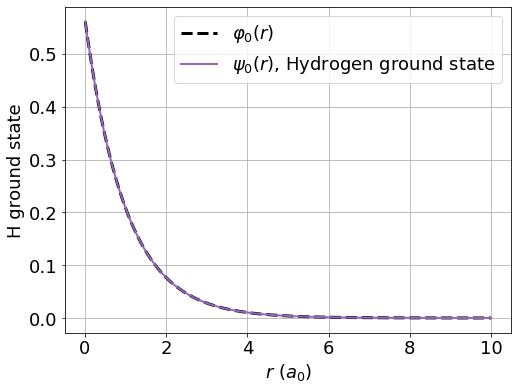

In [11]:
phi0_wrong_norm = u0/(np.sqrt(4*np.pi)*r)
k2 = 4*np.pi * np.trapz((phi0_wrong_norm*r)**2, r)  # The 4pi comes from the integration over all space of our symmetric wavefunction - not just radial wavefunction
phi0 = phi0_wrong_norm / np.sqrt(k2)  # L2-normalize the wave-function
# print(np.trapz(4*np.pi*(phi0*r)**2, r))

print(f'Ground state energy: E0 = {E0:.6f} a.u.')

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(r, np.abs(phi0), color='k', linestyle='--', linewidth=3, label=r'$\varphi_0(r)$')
ax.plot(r, hydrogen_ground_state(r), color='C4', linestyle='-', linewidth=2, label=r'$\psi_0(r)$, Hydrogen ground state')
ax.legend(loc='best')
ax.grid()
ax.set_xlabel(r'$r$ $(a_0)$')
ax.set_ylabel(r'H ground state')

Here we seem to get $\varphi(r) = -\psi(r)$. But this is no problem, and is probably only an artefact of the eigenvalue solving routine. If $v$ is an eigenvector to $Av = \lambda v$, then $-v$ is an eigenvector to $A$ with the same eigenvalue. So we can take the absolute value.

## Problem 4 - Iterative solution

We need to iteratively improve our estimate of the ground state energy in the Hartree approximation. We thus use the solution of the Kohn-Sham equation, but omit the exchange-correlation term as well as the self-interaction from the Hartree potential, thus setting $V_H = V_{sH}$. Our procedure will thus look like 

1. Guess the initial density $|\varphi_{i}|^2$.
2. Obtain the estimate for the Hartree potential using $A' U_0' = B$ from Problem 2 to solve for $V_{sH} = U/r$.
3. Obtain the estimate of the ground state energy and the new density from the eigenvalue problem $\Lambda \tilde{u} = E\tilde{u}$ as in Problem 3.

We repeat this scheme until the ground state energy has converged. The matrix $\Lambda$ has the following form: 

\begin{equation}
    \Lambda = 
    \begin{bmatrix}
        \frac{1}{h^2} -\frac{1}{r_1} + V_{sH}(r_1) & -\frac{1}{2h^2} & 0 & 0 & 0 \\
         -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{1}{r_2} + V_{sH}(r_2) & -\frac{1}{2h^2} & 0 & 0 \\
         0 & -\frac{1}{2h^2} & \frac{1}{h^2} -\frac{1}{r_3} + V_{sH}(r_3)  & -\frac{1}{2h^2} & 0 \\
        ... \\
    \end{bmatrix}
\end{equation}

We use the ground state of hydrogen as our input density:

$$ \varphi_i(r) = \frac{1}{\sqrt{\pi}} e^{-2r}$$

In [28]:
def iterative_step(phi_dens, V_x, V_c, A_p, r, h, N, problem):
    '''Perform a step of the iterative solution. Prepared for Problems 5 and 6 with V_x and V_c.'''
    
    #******** Estimate V_sH ***********
    B = -np.array([4*np.pi*h**2*phi_dens[i]*r[i] for i in range(N)])
    U0_p = np.linalg.solve(A_p, B) # Solve the system of equations for U_0
    rmax = r[-1] + h  # The endpoint distance
    U = U0_p + r/rmax # Extract U
    V_sH = U/r # Extract the static potential
    
    if problem==4:
        V_H = V_sH
    elif problem==5 or problem == 6:
        V_H = 2*V_sH
    
    #******** Estimate E_0 and phi_0 ***********
    Lambda = np.zeros((N,N)) + np.diagflat((1/h**2 - 1/r + V_sH + V_x + V_c)*np.ones(N), k=0) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=1) + np.diagflat(-1/(2*h**2)*np.ones(N-1), k=-1)

    eigs, eigv = np.linalg.eigh(Lambda)  # Solve the eigenvalue problem for eigenvectors and eigenfunctions 
    E0 = eigs[0]  # The eigenvalues & vectors are returned in ascending order, thus with the ground state first
    u0 = eigv[:,0]  # Normalized eigenvector
    
    phi0_wrong_norm = u0/(np.sqrt(4*np.pi)*r)
    k2 = 4*np.pi * np.trapz((phi0_wrong_norm*r)**2, r)  # The 4pi comes from the integration over all space of our symmetric wavefunction - not just radial wavefunction
    phi0 = phi0_wrong_norm / np.sqrt(k2)  # L2-normalize the wave-function
    print(f'Ground state energy: E0 = {E0:.6f} a.u.')
    
    #******** Return E_0 and phi_0 ***********
    return E0, phi0

In [32]:
# Iteration parameters
energies = []  # Ground-state energies
iters = 0
previous_E = -999 # No previous energy


#******** Initial Step ********* 
rmax = 5 # Initial rmax
h = 0.1 # Initial grid spacing
N = int(rmax/h)
r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
# The A'-matrix is the same regardless of the density
A_p = np.zeros((N,N)) + np.diagflat(-2*np.ones(N), k=0) + np.diagflat(np.ones(N-1), k=1) + np.diagflat(np.ones(N-1), k=-1) 
phi_dens = hydrogen_ground_state(r)**2  # Initial guess

# Make an initial estimate of the energy and ground state density:
E0, phi0 = iterative_step(phi_dens, 0, 0, A_p, r, h, N, problem=4)
energies.append(E0)

#******** Iteratively increase rmax *********
while np.abs(E0-previous_E) > 1e-5:
    previous_E = E0  # Save previous energy
    rmax += 1.0 # Increase rmax
    
    h = 0.1 # Grid spacing  # Fix!
    N = int(rmax/h)
    r = np.array([(i+1)*h for i in range(N)]) # N points between endpoints
    # The A'-matrix is the same regardless of the density
    A_p = np.zeros((N,N)) + np.diagflat(-2*np.ones(N), k=0) + np.diagflat(np.ones(N-1), k=1) + np.diagflat(np.ones(N-1), k=-1) 
    phi_dens = phi0**2
    phi_dens = np.pad(phi_dens, (0,N-len(phi_dens)), 'constant', constant_values=(0,0))  # Pad density with zero to new maximum value

    E0, phi0 = iterative_step(phi_dens, 0, 0, A_p, r, h, N, problem=4)
    energies.append(E0)
    iters += 1
    print(iters)



Ground state energy: E0 = 0.084508 a.u.
60


IndexError: index 50 is out of bounds for axis 0 with size 50